In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'coffee-shop-sales-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5498225%2F9109810%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240916%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240916T170115Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D97a187771c7a5167b27985b2dbae87d1da2258f31d547f22e186d679c7487de23d3132e995cb95034880847f4e675ef7d188556eb91fb29a69ea5386ccac4c5601fd3030070da1ee7945abfbcec1c0424aa7da444ccaad1085f202a8875729468178ed765dbbf978b656e73219de5aa7a94ab49680851182e58031ab56b9d9d8553e69f855fefff8d83505bff7de6ce2a741fc04b6d5614eed153fa7eb3dc17a135660ec5b805fcd631e81b7abe72d25c5a1fb19027f211557ee6993323515def55a85f278e6a71d2430e441f02d2b2bf2135acfa895110d1630e1c7fa80e4db90cde7e1347a51909800eaa129d1f3adae082314409d4198024129be62e01f8b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!pip install openpyxl
!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 1.9 MB/s eta 0:00:00
[==================================================] 17622402 bytes downloaded
Downloaded and uncompressed: coffee-shop-sales-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import openpyxl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-shop-sales-dataset/Coffee Shop Sales.xlsx


In [3]:
df = pd.read_excel("/kaggle/input/coffee-shop-sales-dataset/Coffee Shop Sales.xlsx",  sheet_name="Transactions") #benim kullanmam gereken tablo spesifik olarak transactions oldugu icin excel sheetlerinin arasından ona ulasmak icin sheet_name = "Transaction" kullandım.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.info() #veriye dair genel bir bakış sağlar. 149116 satır ve 17 kolonum var. kütüphanelerimin çalışması için non-null değerlerimin olması çok önemli, sorun olmadığını görüyorum.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Revenue           149116 non-null  float64       
 12  Month             149116 non-null  int64         
 13  Month.1           149116 non-null  object        
 14  Week

In [6]:
df.head(10) #komutu ile ilk 10 satırı görüyorum.

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1,Jan,7,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,Jan,7,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,Jan,7,Sun,7
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,3.00,1,Jan,7,Sun,7
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,7
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,4.00,1,Jan,7,Sun,7
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,4.25,1,Jan,7,Sun,7
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,7.00,1,Jan,7,Sun,7


In [7]:
df.duplicated().sum() #Dataframe'deki tekrar eden satırları bulur. 0 olması bütün satırların birbirinden farklı ve benzersiz olduğunu gösterir.

0

In [8]:
df = df.rename({'transaction_id' : 'order_number',
                'transaction_date' : 'order_date',
                'transaction_time' : 'order_time',
                'transaction_qty': 'order_quantity',
                'store_id': 'store_id',
                'store_location': 'store_location',
                'product_id': 'product_id',
                'unit_price': 'product_price',
                'product_category': 'product_category',
                'product_type': 'product_type',
                'product_detail' : 'product_detail',
                'Revenue' : 'revenue',
                'Month' : 'Month_by_number',
                'Month.1' : 'Month_by_name' ,
                'Weekday' : 'Weekday_by_number' ,
                'Weekday.1' : 'Weekday_by_name' ,}, axis = 1)
                # Sutün isimlerini daha anlaşılabilir, okunabilir hale getirdim.

In [9]:
print(df['Month_by_name'].unique()) #DataFrame içinde yer alan verinin hangi ayları kapsadığını merak ettim, bu bilgi EDA kısmındaki grafikler için yardımcı oldu.

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun']


In [10]:
df.tail() #DataFrame içinde yer alan satırların sonuna bakmak istedim, 6. ayın son gününe kadar ilerlediğini teyit ettim.

,order_number,order_date,order_time,order_quantity,store_id,store_location,product_id,product_price,product_category,product_type,product_detail,revenue,Month_by_number,Month_by_name,Weekday_by_number,Weekday_by_name,Hour
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,6,Jun,5,Fri,20
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,6,Jun,5,Fri,20
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,6,Jun,5,Fri,20
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,6,Jun,5,Fri,20
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup,1.60,6,Jun,5,Fri,20


In [11]:
print(df['store_id'].unique())
print(df['store_location'].unique())
print(df['product_id'].unique(), len(df['product_id'].unique()))
print(df['product_category'].unique())
#3 ayrı lokasyonumun olduğunu,lokasyonlarımın kafe idleri ile uyuştuğunu, Ayrıca; 80 ayrı ürün çeşidimin olduğunu, ve bunların 9 ayrı kategoriye ait olduğunu gördüm.

[5 8 3]
['Lower Manhattan' "Hell's Kitchen" 'Astoria']
[32 57 59 22 77 28 39 58 56 33 51 87 47 79 42 61 69 40 43 76 45 71 38 26
 27 29 54 55 24 60 78 44 48 23 46 25 34 36 74 53 41 37 50 72 35 70 73 75
 31 49 52 30 64 12 63  6  9 65 84 19  7  1 17 10  4 15 16  3 20 83 18 21
 13 11  5  2 81 14  8 82] 80
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


In [12]:
product_category_list = df['product_category'].unique()
product_category_list

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

## **Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)**

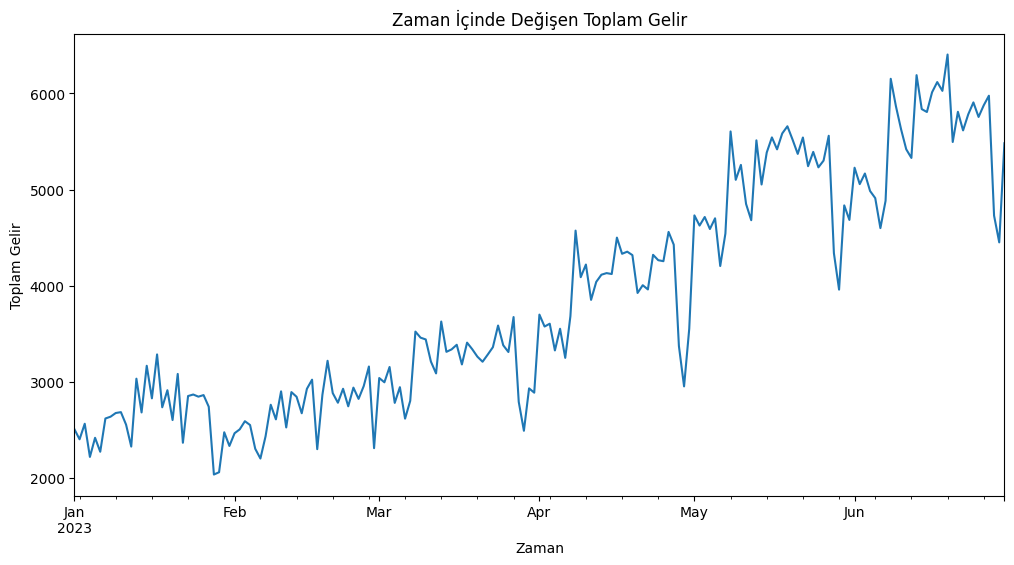

In [13]:
import matplotlib.pyplot as plt

# Plotting Revenue over Time
plt.figure(figsize=(12, 6))
df.groupby('order_date')['revenue'].sum().plot()
plt.title('Zaman İçinde Değişen Toplam Gelir')
plt.xlabel('Zaman')
plt.ylabel('Toplam Gelir')
plt.show()


  

*   1 Ocak 2023'den 30 Haziran 2023'e kadar gösterilen, 2000 birim ile başlayan kazanç, zaman zaman düşüşler yaşasa da genel olarak yükselme eğilimindedir, özellikle Nisan ayı sonlarından itibaren ciddi bir artış gözlemlenmektedir. Haziran ayına kadar gelirin 6000 birimi geçtiği görülüyor. Bu işin büyüme trendinde olduğunu söyleyebiliriz.




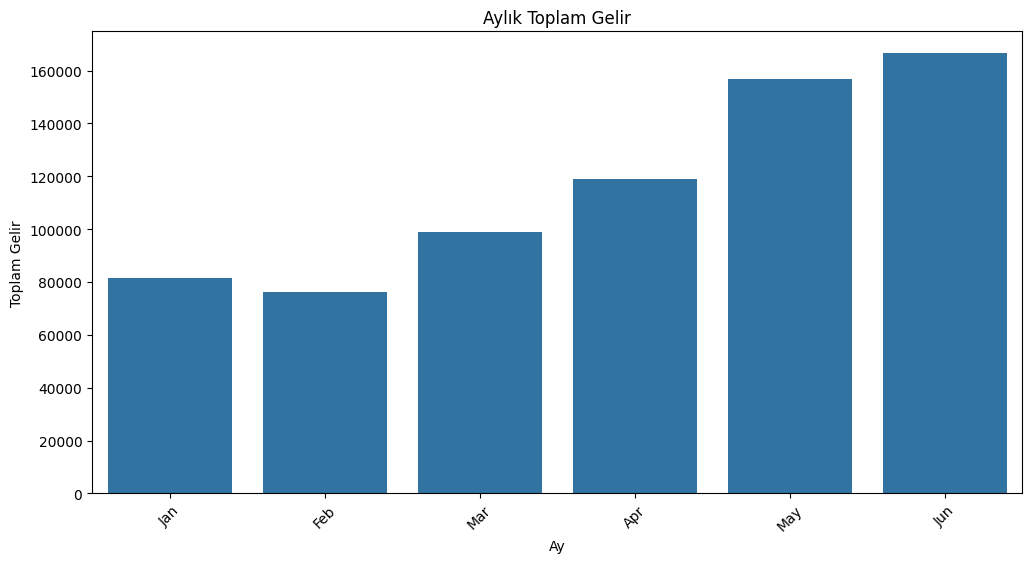

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aylık Gelir Tablosu
plt.figure(figsize=(12, 6))
sns.barplot(x='Month_by_name', y='revenue', data=df, estimator=sum, errorbar=None, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.title('Aylık Toplam Gelir')
plt.xlabel('Ay')
plt.ylabel('Toplam Gelir')
plt.xticks(rotation=45)
plt.show()



*   Ocak ayında toplam gelir 80.000 seviyesindedir. Şubat ayında azalma yaşanmıştır fakat benzer seviyelerdedir. Mart ayı ile birlikte gelir 100.000 seviyesine ulaşmıştır. Artış sürekli devam etmektedir ve Haziran ayında toplam 160.000 bin satış yapıldığını görüyoruz. Yukarıdaki grafiğimizi matematiksel ve ay genelinde daha net bir şekilde görmüş oluyoruz.

*   Şubat ayındaki düşüsün diğer aylara göre 2-3 gün kısa olmasından kaynaklandığını düşünüyorum.


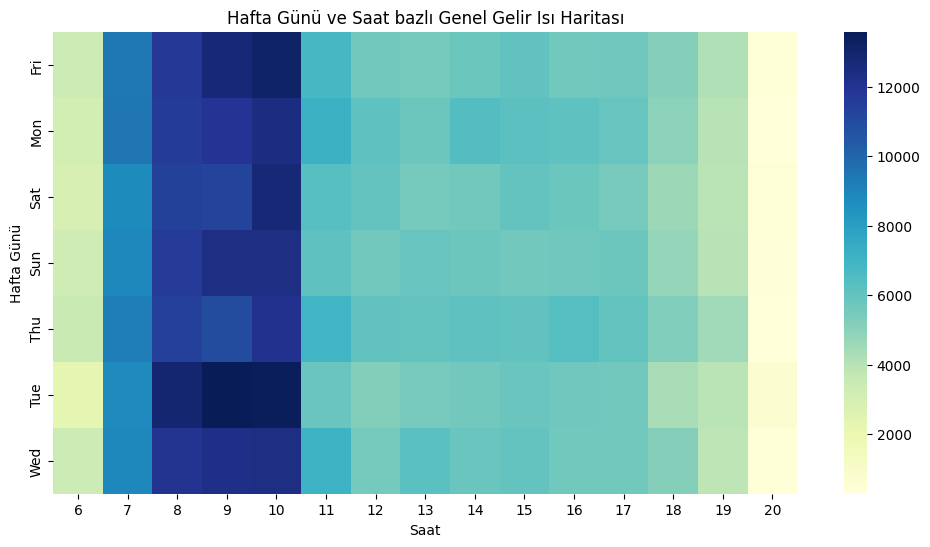

In [15]:
# Hafta Günü ve Saat bazlı Genel Gelir Isı Haritası
pivot_table = df.pivot_table(values='revenue', index='Weekday_by_name', columns='Hour', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Hafta Günü ve Saat bazlı Genel Gelir Isı Haritası')
plt.xlabel('Saat')
plt.ylabel('Hafta Günü')
plt.show()



*   Özellikle sabah saat 7 ile 10 arasındaki gelirlerde yoğunluk gözlemlenmektedir. **Özellikle Salı günü** saat 8 ile 10 arasında ve Cuma günü 9 ve 10 saatleri arasında çok daha fazla bir gelir yoğunluğunun yaşandığını da söyleyebiliriz. Saat 11 ile 18 arası ortalama bir gelir dağılımı mevcut iken saat 6 ve 19 için benzer ve düşük gelirin olduğunu söyleyebiliriz. Saat 20'de ise en düşük gelir seviyesini gözlemleyebiliriz.


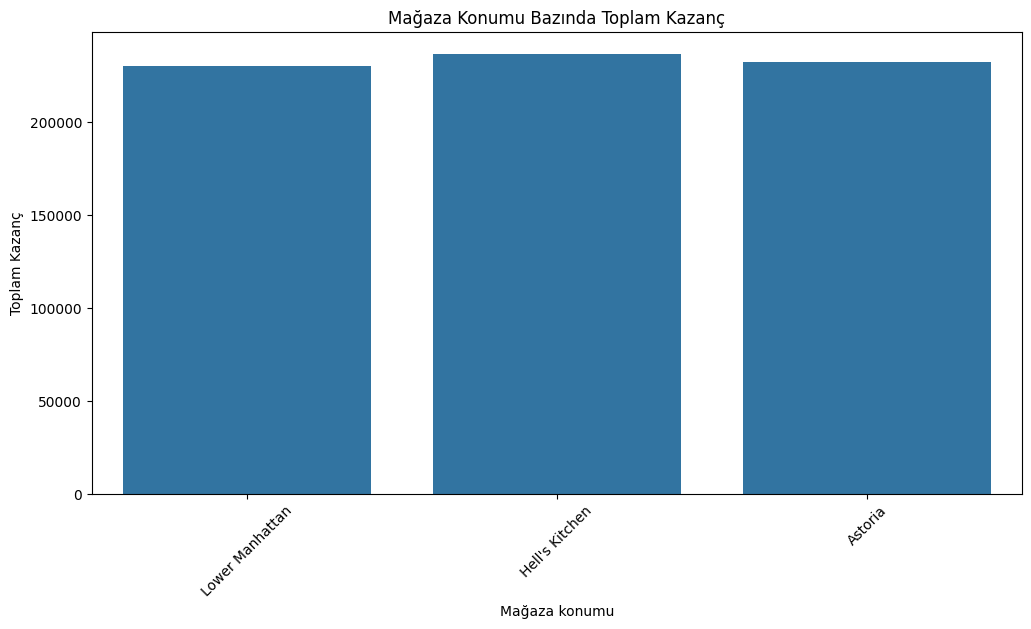

In [16]:

# Mağaza konumu bazında Toplam Gelir
plt.figure(figsize=(12, 6))
sns.barplot(x='store_location', y='revenue', data=df, estimator=sum, errorbar=None)
plt.title('Mağaza Konumu Bazında Toplam Gelir')
plt.xlabel('Mağaza konumu')
plt.ylabel('Toplam Kazanç')
plt.xticks(rotation=45)
plt.show()



*   Mağazaların 3 ayrı konumu için benzer sayıda satış yapıldığını gözlemliyoruz. Bütün mağazalar ortalama 180.000 değerinin üzerinde gelir elde etmiştir fakat Hell's Kitchen lokasyonundaki mağaza için biraz daha fazla satış yaptığını da bu grafikten çıkartabiliriz.


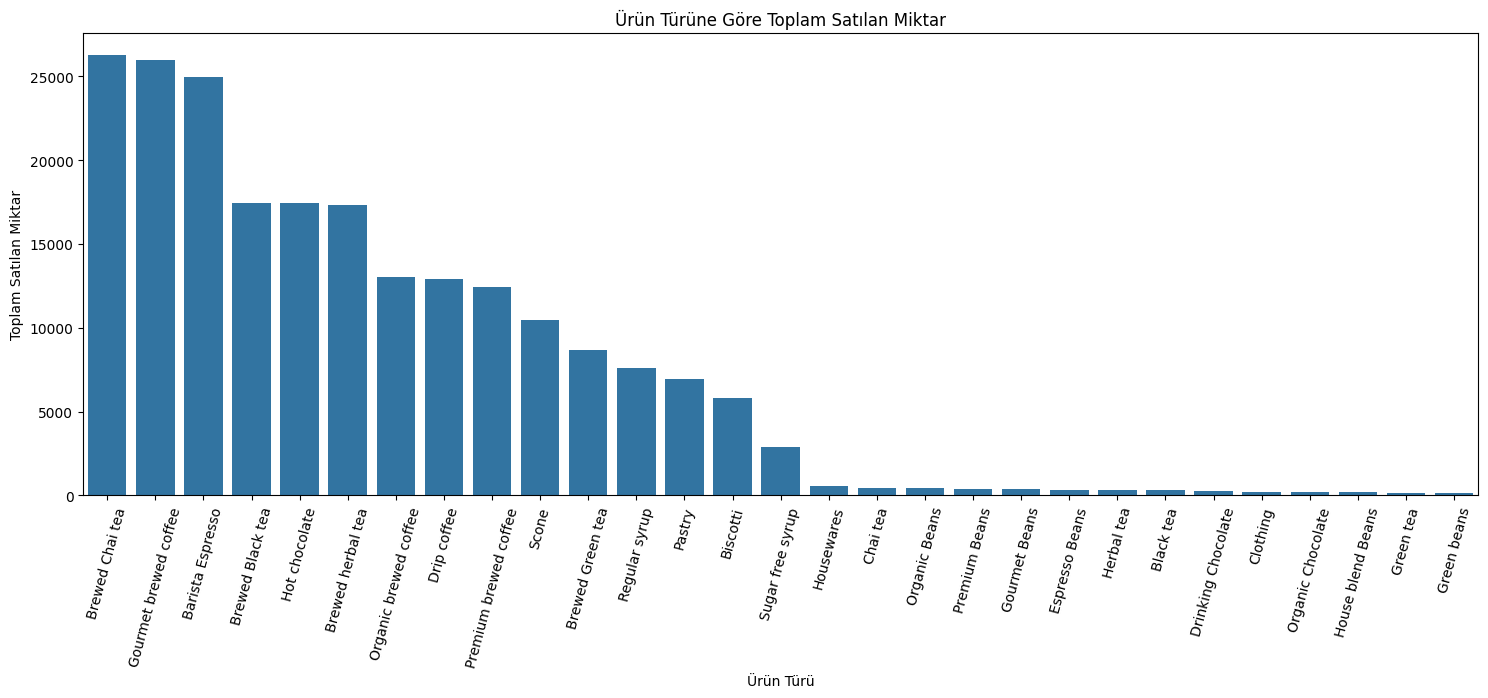

In [17]:
# Ürün Türü Bazında Toplam Sipariş Miktarını hesaplamak için ilk olarak datalarımı gurupladım

agg_data = df.groupby('product_type')['order_quantity'].sum().reset_index()

# Sipariş miktarı yüksekten düşüğe göre sıraladım
agg_data = agg_data.sort_values(by='order_quantity', ascending=False)

plt.figure(figsize=(18, 6))
sns.barplot(x='product_type', y='order_quantity', data=agg_data, estimator=sum, errorbar=None)
plt.title('Ürün Türüne Göre Toplam Satılan Miktar')
plt.xlabel('Ürün Türü')
plt.ylabel('Toplam Satılan Miktar')
plt.xticks(rotation=75)
plt.show()


*  Brewed Chai Tea ve Gourmet Brewed Coffee en yüksek satışa sahip ürünlerdir. Bu iki ürünü Barista Espresso takip eder. Ortalama satış değerlerinde ise Brewed Black Tea, Hot Chocolate, Brewed Herbal Tea yer alıyor. En çok satılan 10 ürün çeşidi için konuşacak olursak 5 kahve, 3 çay, 1 içilebilir çikolata, bir de fırın ürünü bulunuyor. Scone ürünü çoğunlukla kahve ürününün eşlikçisi olarak kabul edildiği için bu da bize bu mağazanın kahve bazlı ürünlerinin diğer ürünlere oranla daha fazla satıldığını gösteriyor olabilir.






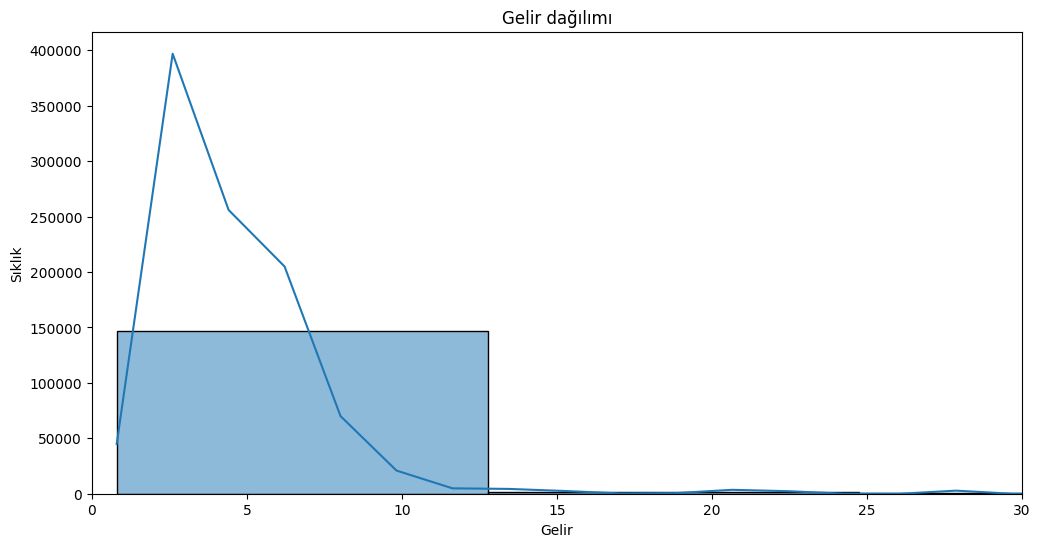

In [18]:
# Gelir dağılım Histogramı
plt.figure(figsize=(12, 6))
sns.histplot(df['revenue'], bins=30, kde=True)
plt.title('Gelir dağılımı')
plt.xlabel('Gelir')
plt.ylabel('Sıklık')
plt.xlim(0, 30)
plt.show()


*  Siparişlerin çok büyük bir oranının 0 ile 5 gelir aralığı içinde olduğu gözlemlenir. ( Hatta 0 ile 1 arasında ) Sipariş bazında gelirin 5'in üzerine çıkması ile birlikte kazanılan gelir çok hızlı bir şekilde düşmektedir. Bu da bu mağazanın gelirinin çok büyük bir yüzdesini 5 birim ve daha altındaki satışlarından elde ettiğini gösterir. 5 ile 10 birimlik kazanç sağlayan ürünlerde kampanya düzenlenmesi bu noktada mağazanın satışlarını pozitif yönde etkileyecektir.

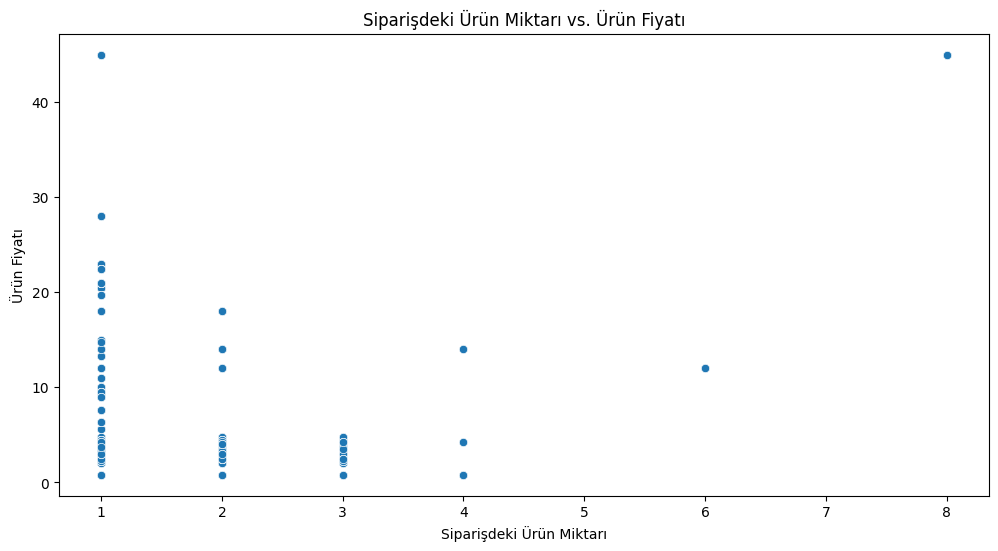

In [19]:
# Siparişteki Ürün Miktarı vs. Ürün Fiyatı
plt.figure(figsize=(12, 6))
sns.scatterplot(x='order_quantity', y='product_price', data=df)
plt.title('Siparişteki Ürün Miktarı vs. Ürün Fiyatı')
plt.xlabel('Siparişteki Ürün Miktarı')
plt.ylabel('Ürün Fiyatı')
plt.show()



*   Sipariş miktarının 1 ile 3 arasında olduğu noktalar yoğun bir şekilde yayılmış. Bu, çoğu siparişin az sayıda ürün içerdiğini gösteriyor. Çoklu satın alınan ürünlerde de fiyat artışını çok görmüyoruz. Yukarıda bahsettiğim gibi çoklu ürün alımı için bir kampanya düzenlenmesi bu noktada işletmenin kazancını arttırabilir gibi görülüyor.


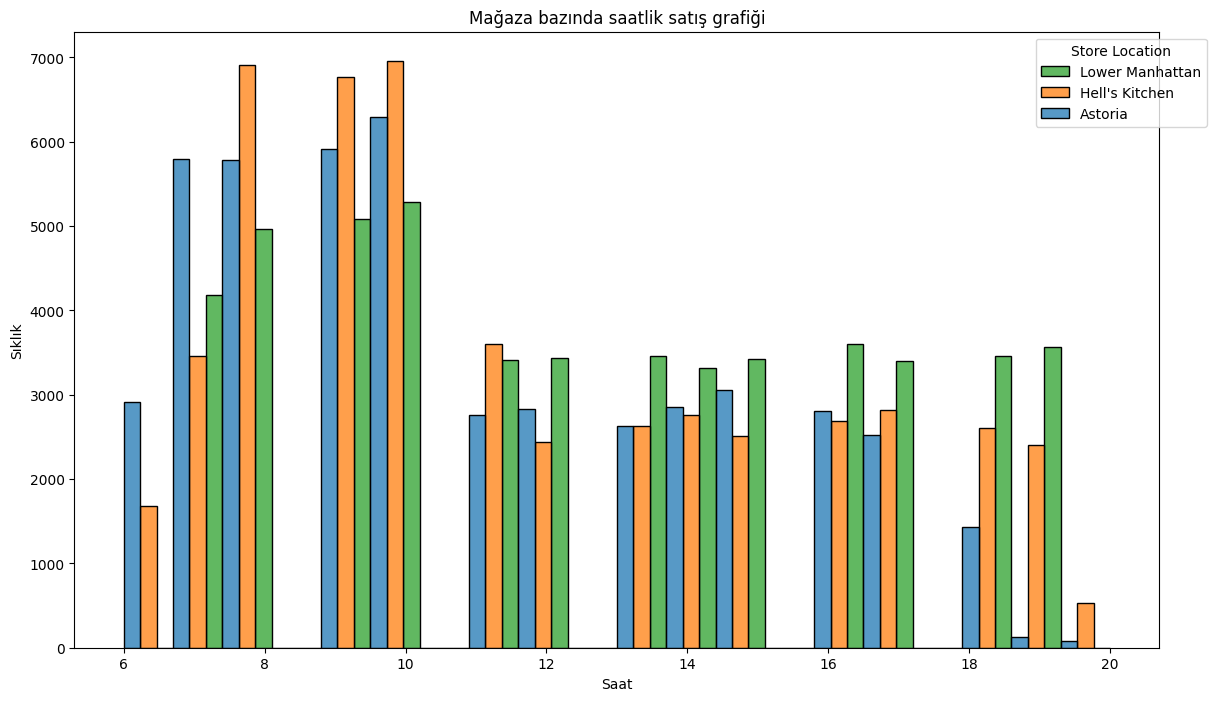

In [20]:
# Mağaza konumlarının unique değerlerini aldım
store_locations = df['store_location'].unique()

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Hour', hue='store_location', multiple='dodge', bins=20, hue_order=store_locations)
plt.title('Mağaza bazında saatlik satış grafiği')
plt.xlabel('Saat')
plt.ylabel('Sıklık')
plt.legend( df['store_location'].unique(), title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()



*   Yeşil bar, Lower Manhattan bölgesindeki, turuncu bar Hell's Kitchen bölgesindeki, Mavi bar de Astoria bölgesindeki mağazayı temzil ediyor.

*   Lower Manhattan bölgesindeki mağaza, genel olarak saat 7:00 civarında satışlarına yoğun bir şekilde (4.000 satış ile) başlar saat 10:00'a kadar artarak en yüksek seviyesine ulaşır. (5.000 satış) günün devamında ise satışlar ortalama değerine (3.500 satış) seyrine geriler ve istikrarlı bir şekilde saat 20:00'a kadar bu şekilde ilerler.

*  Hell's Kitchen bölgesindeki mağaza için, satışlar daha erken başlamasına rağmen (saat 6:00)çok yoğunluk yoktur. Saat 7:00'da iki katına ulaşsa da asıl peak noktasına saat 8:00'da ulaşır ve saat 10:00'a kadar dalgalanmalar olsa da benzer bir seviyede ilerler. (7.000 satış civarı) saat 11:00'da da gün içi ortalama rakamın üstünde bir yoğunluk vardır (3.500 satış civarı) ve saat 12:00 itibari ile gün içi  ortalama değeri olan 2.500 satış ile devam eder. Lower Manhattan mağazasına göre ortalama satışları gün ortasında daha azdır ve saat 20:00'a yaklaştığında ise yoğunluğu en düşük seviyesine ulaşır.

*   Astoria bölgesindeki mağaza için, satışlar Hell's Kitchen bölgesindeki mağaza gibi daha erken bir saatte başlar fakat daha yoğundur. (2.900 satış civarı) Diğer iki mağazada olduğu gibi saat 7:00 ve 10:00 arasında en yoğun olduğu zaman dilimindedir. Saat 11:00 ile yoğunluğu azalır ve günlük ortalama seviyesinde (2.800 satış civarı) saat 18:00'a kadar ilerler. Diğer iki mağazadan çok daha erken bir zamanda yoğunluk seviyesi ciddi bir şekilde düşer ve neredeyse sıfırlanır. Özellikle bu konumdaki mağaza için saat 18:00-20:00 arasında çeşitli kampanya düzenlenmesi ya da hizmet iyileştirmesi yapılması gerekli olabilir.



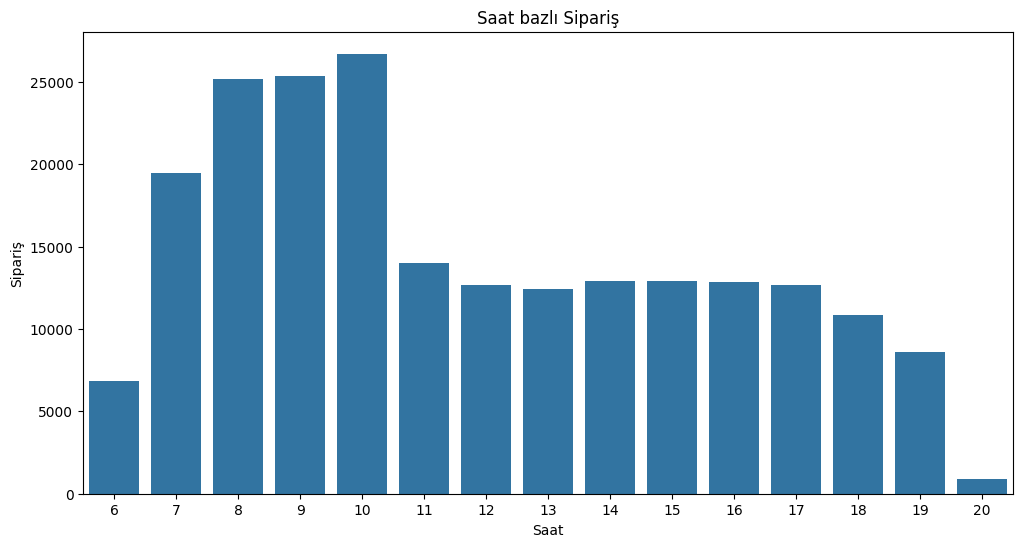

In [21]:
# Saat Bazında Sipariş
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='order_quantity', data=df, estimator=sum, errorbar=None)
plt.title('Saat bazlı Sipariş')
plt.xlabel('Saat')
plt.ylabel('Sipariş')
plt.show()



*   Daha önce de bahsettiğim gibi, bu grafikte de genel olarak saat 7 ile 10 arasında yoğunluğun yaşandığını (rush hour) saat 11 ile 17 arasındaki yoğunluğun benzer seviyelerde ilerlediğini 18 itibariyle sipariş sayısında düşüş yaşandığını görüyoruz. Herhangi bir kampanya uygulanacaksa saat 7 ile 10 arasında uygulanması önerilebilir.



# **Label Encoding**

In [22]:
# LabelEncoder nesnesi oluşturmak ve veriyi dönüştürmek
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df[['product_category']])
df['product_category'] = encoded_data
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,order_number,order_date,order_time,order_quantity,store_id,store_location,product_id,product_price,product_category,product_type,product_detail,revenue,Month_by_number,Month_by_name,Weekday_by_number,Weekday_by_name,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,2,Gourmet brewed coffee,Ethiopia Rg,6.0,1,Jan,7,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,8,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,4,Hot chocolate,Dark chocolate Lg,9.0,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,2,Drip coffee,Our Old Time Diner Blend Sm,2.0,1,Jan,7,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,8,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7


<Axes: >

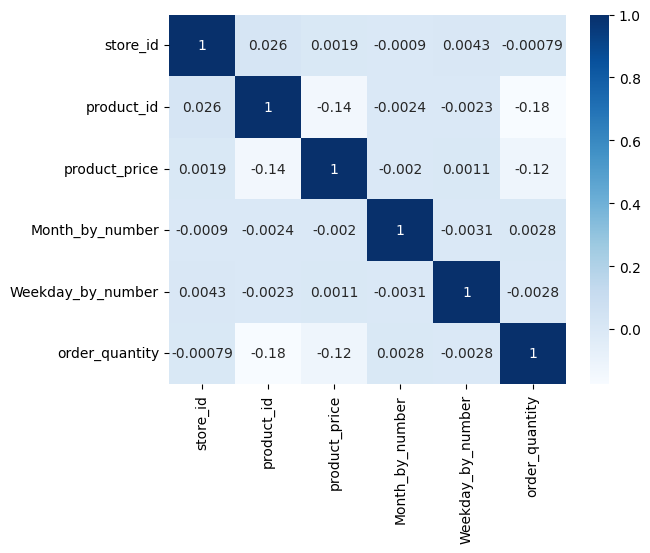

In [23]:
correlation = df[['store_id', 'product_id', 'product_price', 'Month_by_number', 'Weekday_by_number', 'order_quantity']].corr()
sns.heatmap(correlation, annot=True, cmap="Blues")

Korelasyon matrisi, farklı değişkenler arasındaki ilişkiyi göstermektedir.

*   store_id yani mağazamızın farklı lokasyonlardaki şubeleri için söz edilebilecek güçlü bir korelasyon yoktur.
*   "product_id" ile "product_price" arasında -0.14 gibi bir negatif korelasyon vardır. Bu, ürün kimliği ile ürün fiyatı arasında hafif bir ters ilişki olduğunu, yani belirli ürünlerin daha yüksek fiyatlı olma eğiliminde olmadığını gösterebilir. "order_quantity" ile ise -0.18'lik bir korelasyon var. Yani, ürün kimliği ve sipariş miktarı arasında zayıf bir negatif ilişki var; bazı ürünler daha az sipariş ediliyor olabilir.


*   "product_price" ile "order_quantity" arasında -0.12 gibi zayıf bir negatif korelasyon var. Ürün fiyatı arttıkça sipariş miktarının biraz düştüğünü gözlemleniyor.
*   Ay ve Gün numaralarına göre diğer değişkenlerde neredeyse hiç korelasyon yok. Bu zaman değişimlerinin verimizde etkili olmadığını gösteriyor. Her gün ve her ayın benzer düzende ilerlediği söylenebilir.





## **1) Denetimli Öğrenme (Supervised Learning)**

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [25]:
X = df[['store_id', 'product_id', 'product_price','product_category', 'Hour']]
y = df['order_quantity']

In [26]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## İlk olarak Linear Regression modeli deniyorum.

In [27]:
# Modeli oluşturma ve eğitme. Ben Linear Regression ile denedim ilk olarak.
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)

LinearRegression()

In [28]:
# Tahmin yapma
linear_y_pred = linearmodel.predict(X_test)

In [29]:
# Performans değerlendirmesi için mse, mae ve rmse çıktılarını kontrol ediyorum.
mse = mean_squared_error(y_test, linear_y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.26569234066684805


In [30]:
# MAE Hesaplama
mae = mean_absolute_error(y_test, linear_y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.4687774852918802


In [31]:
# RMSE Hesaplama
rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.5154535291050475


Mağaza kimliği, ürün kimliği, ürün fiyatı, label coding yapılmış ürün kategorilerim ve zaman değerlerimin üzerinden geleceğe yönelik sipariş adedi tahminlemesi yapıyorum. Parametrelerimi kendim atadım, yine de hiperparametre sonucumda aldığım çıktı ile neredeyse aynı sonucu elde ettim. Bunun iyi bir çıktı olduğunu düşünüyorum.

## İkinci olarak RandomForest modelini inceliyorum.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score


In [33]:
# Modeli oluşturma ve eğitme
randomforest_model = RandomForestClassifier(n_estimators=30, random_state=42)
randomforest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [34]:
# Tahmin yapma
randomforest_y_pred = randomforest_model.predict(X_test)


In [35]:
# Performans değerlendirmesi için mse, rmse, mae, accuracy ve R-squared çıktılarını kontrol ediyorum.
mse = mean_squared_error(y_test, randomforest_y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.4082618025751073


In [36]:
#RMSE Hesaplama
rmse = np.sqrt(mean_squared_error(y_test, randomforest_y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.638953677957258


In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, randomforest_y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.38405311158798283


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(f'accuracy: {accuracy_score(y_test, randomforest_y_pred)}')

accuracy: 0.628017703862661


In [39]:
r2 = r2_score(y_test, randomforest_y_pred)
print(f'R-squared: {r2}')

R-squared: -0.4046680200029711


Burada da aldığım sonuç hiperparametre sonuçlarıma oldukça yakın. Denediğim kümenin optimuma yakın bir sonuç içerdiğini gördüm.

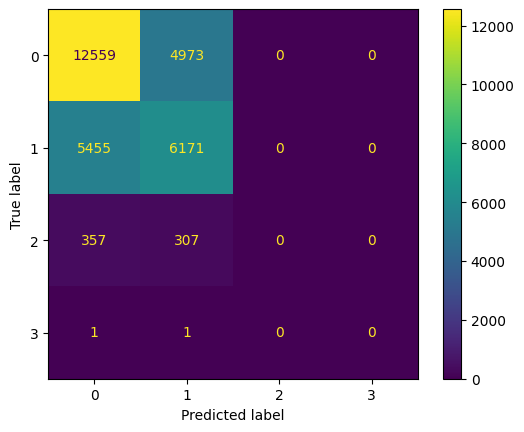

In [40]:
confusion_matrix(y_test, randomforest_y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, randomforest_y_pred), display_labels = [0, 1, 2, 3]) # Adjusted display labels to match number of classes
cm_display.plot()
plt.show()



*   Model, 12559 örneği doğru şekilde 0 olarak sınıflandırmış, 4973 örnek yanlış bir şekilde 1 olarak sınıflandırmış.
*   Model, 6171 örneği doğru şekilde 1 olarak sınıflandırmış.
5455 örnek yanlış bir şekilde 0 olarak sınıflandırmış.
*  Model, 307 örneği doğru şekilde 2 olarak sınıflandırmış.
357 örnek yanlış bir şekilde 0 olarak sınıflandırılmış.
*   Model, 0 örneği doğru şekilde 3 olarak sınıflandırmış.
1 örnek yanlış bir şekilde 0, 1 örnek ise 1 olarak sınıflandırılmış.


*   Modelin genel olarak daha yüksek performansı 0 ve 1 sınıflarında, çünkü doğru sınıflandırmaların sayısı (12559 ve 6171) yüksek. Ancak özellikle 0 ve 1 sınıflarında hatalı sınıflandırmalar da mevcut (4973 ve 5455).
*  Modelin genel olarak doğruluk oranının yüksek olduğunu söyleyebiliriz, yine de yüksek bir doğruluk oranına sahip değil. Farklı değerlerde (2 ve 3) daha fazla veri değerine sahip olduğunda doğruluk oranının yükseleceğini tahmin ediyorum.







## **2) Denetimsiz Öğrenme (Unsupervised Learning)**

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Mağazaları kümelemek için veri hazırlığı
store_data = df.groupby('store_location')['revenue'].sum().reset_index() #Mağaza lokasyonu ve gelir verilerini kendi içlerinde grupladım. Bu bana her mağazanın toplam gelirini hesaplar.
store_data_scaled = StandardScaler().fit_transform(store_data[['revenue']]) #Gelir verisini ölçeklemek için standartlaştırma kullanılır.

In [43]:
# Ürün kategorilerini kümelemek için veri hazırlığı
product_data = df.groupby('product_category')['revenue'].sum().reset_index() #Ürün kategorilerine göre gelir verilerini gruplar ve her kategorinin toplam gelirini hesaplar.
product_data_scaled = StandardScaler().fit_transform(product_data[['revenue']]) #Ürün kategorilerinin gelir verilerini ölçeklemek için standartlaştırma kullanılır.

In [44]:
# KMeans modeli oluşturma ve n_init parametresini belirleme
kmeans_store = KMeans(n_clusters=3, n_init=10, random_state=42) #Kmeans algoritması kurulur. 3 küme kurulur(3 lokasyonum olduğu için daha fazla sayıda küme kullanamıyorum), 10 farklı başlatma yapılır, rastgelelik için sabit bir sayı 42 belirlenir.
store_clusters = kmeans_store.fit_predict(store_data_scaled) #Burada ayrı ayrı yazmak yerine fit ve predict'i birlikte yaptım.
store_data['Cluster'] = store_clusters

In [45]:
# K-Means modeli ürün kategorileri için (n_clusters ürün küme sayısı)
kmeans_product = KMeans(n_clusters=3, n_init=10, random_state=42)
product_clusters = kmeans_product.fit_predict(product_data_scaled)
product_data['Cluster'] = product_clusters

In [46]:
# Store için küme merkezleri ve atamalar
cluster_centers_store = kmeans_store.cluster_centers_ #KMeans modeli tarafından hesaplanan her kümenin merkezlerini atar.
labels_store = kmeans_store.labels_ #Her veri noktasının hangi kümeye atandığını gösteren etiketleri atar.
print("Mağaza Kümeleri ve Merkezleri:")
print(cluster_centers_store)
print(labels_store)

Mağaza Kümeleri ve Merkezleri:
[[ 1.33345459]
 [-1.07467845]
 [-0.25877614]]
[2 0 1]


In [47]:
# Product için küme merkezleri ve atamalar
cluster_centers_product = kmeans_product.cluster_centers_ #KMeans modeli tarafından hesaplanan her kümenin merkezlerini atar.
labels_product = kmeans_product.labels_ #Her veri noktasının hangi kümeye atandığını gösteren etiketleri atar.
print("Ürün Kümeleri ve Merkezleri:")
print(cluster_centers_product)
print(labels_product)

Ürün Kümeleri ve Merkezleri:
[[-0.69811789]
 [ 1.74844231]
 [-0.00314758]]
[2 0 1 0 2 0 0 0 1]


In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [49]:
# Inertia (WCSS)
inertia = kmeans_product.inertia_
print(f'Inertia (WCSS): {inertia}')

Inertia (WCSS): 0.44903623628678485


In [50]:
# Inertia (WCSS) #Çünkü hepsi ayrı kümede olduğu için 0.0 değeri bulundu.
inertia = kmeans_store.inertia_
print(f'Inertia (WCSS): {inertia}')

Inertia (WCSS): 0.0


In [51]:
# Silhouette Score
silhouette_avg = silhouette_score(product_data_scaled, product_clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6868670069345391


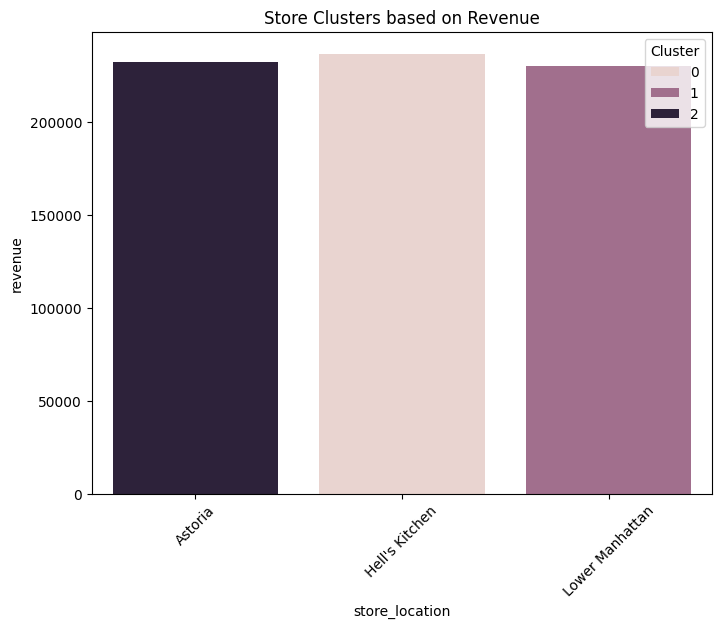

In [52]:
# Sonuçları görselleştirme - Mağaza Kümeleri
plt.figure(figsize=(8, 6))
# Add cluster labels to store_data
sns.barplot(x='store_location', y='revenue', hue='Cluster', data=store_data, dodge=False)
plt.title('Store Clusters based on Revenue')
plt.xticks(rotation=45)
plt.show()



*   Cluster 0, Hell's Kitchen mağazası kategorisini; Cluster 1, Lower Manhattan mağazasının, Cluster 2 Astoria mağazası kategorileri temsil eder.
*   Sonuç olarak her üç mağaza da birbirine yakın gelirler elde etmiş gibi görünüyor fakat ufak bir farkla Hell's Kitchen mağazası en çok geliri elde eden mağazadır. Bu mağazayı Astoria ve Lower Manhattan mağazaları takip eder.



In [53]:
store_data

,store_location,revenue,Cluster
0,Astoria,232243.91,2
1,Hell's Kitchen,236511.17,0
2,Lower Manhattan,230057.25,1




*   Burada da yukarıdaki grafiği sayısal olarak daha iyi anlayabiliyoruz. Sıralamamız yine Hell's Kitchen, Astoria ve Lower Manhattan şeklinde.



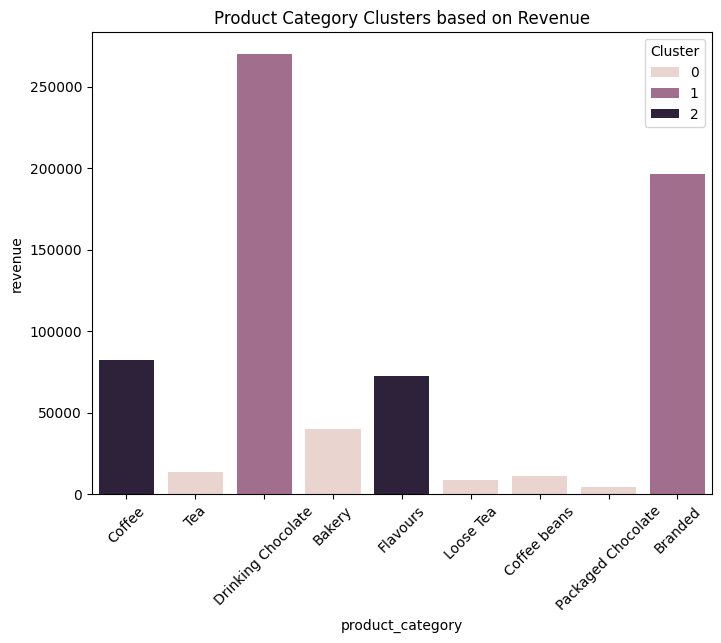

In [54]:
# Sonuçları görselleştirme - Ürün Kategorisi Kümeleri
plt.figure(figsize=(8, 6))
sns.barplot(x='product_category', y='revenue', hue='Cluster', data=product_data, dodge=False)
plt.title('Product Category Clusters based on Revenue')
plt.xticks(ticks=range(len(product_category_list)), labels=product_category_list, rotation=45)
plt.show()



*   Cluster 0, ürün bazı düzeyinde düşük gelir sağlanan kategorileri; Cluster 1, yüksek gelir sağlanan kategorileri, Cluster 2 ise ortalama bir gelir sağlanan kategorileri temsil eder.

*   En yüksek gelir "Drinking Chocolate" ve "Branded" (Spesifik bir marka etiketi bulunan ürünler olabilir) kategorilerinde sağlanmıştır.

*   Orta gelir "Coffe"e ve "Flavors" kategorisinde sağlanmıştır. "Drinking Chocolate" ya da "Branded" kategorileri kadar olmasa da bu kategorinin ürünlerinden de başarılı bir gelir sağlamıştır.

*   En düşük gelir; "Tea", "Loose Tea", "Coffee Beans", ve "Packaged Chocolate" kategorilerine aittir. Bu kategorilerin performanslarının diğerlerine göre daha düşük olduğunu görülüyor.

*   "Drinking Chocolate" ve "Branded" gibi yüksek gelir getiren kategoriler, pazarlama stratejisi veya stok yönetimi için odaklanılacak kategoriler olabilir.
*  "Tea", "Loose Tea", ve "Coffee Beans" gibi düşük gelir getiren kategoriler üzerinde, ürün geliştirme veya promosyon stratejileriyle performansı artırmak için çalışılabilir.



In [55]:
product_data

,product_category,revenue,Cluster
0,0,82315.64,2
1,1,13607.00,0
2,2,269952.45,1
3,3,40085.25,0
4,4,72416.00,2
5,5,8408.80,0
6,6,11213.60,0
7,7,4407.64,0
8,8,196405.95,1


Burada da yukarıdaki grafiği sayısal olarak daha iyi anlayabiliyoruz.

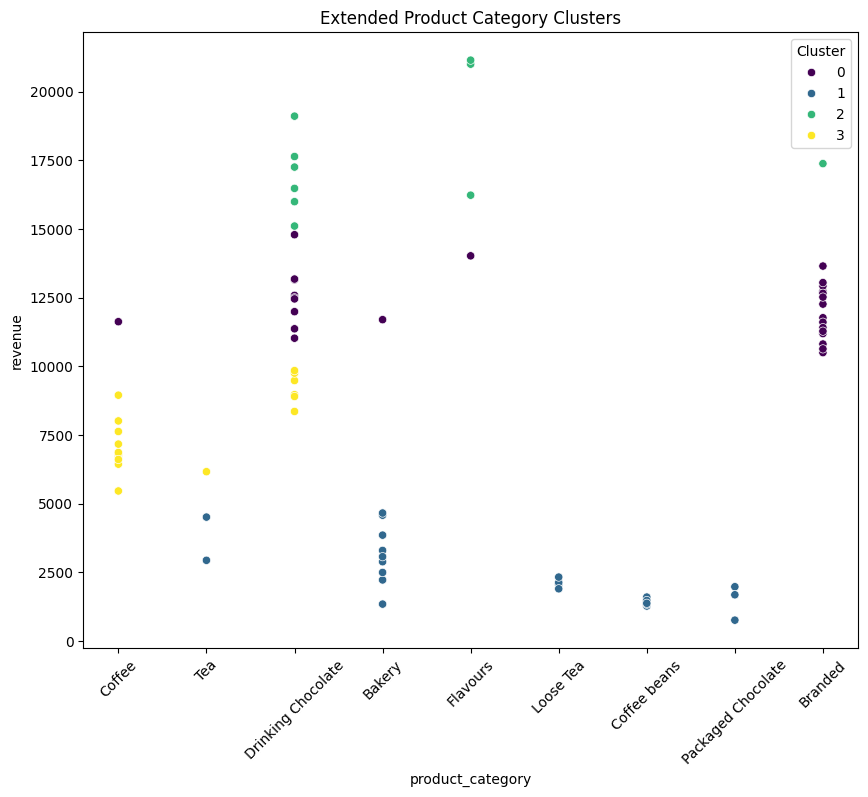

In [56]:
# Örnek olarak ürün kategorileri ve ürün detaylarını ekleyerek kümeleme
product_data_extended = df.groupby(['product_category', 'product_detail'])['revenue'].sum().reset_index()
product_data_extended_scaled = StandardScaler().fit_transform(product_data_extended[['revenue']])

# K-Means modelini yeniden eğitme
kmeans_product_extended = KMeans(n_clusters=4, n_init=10, random_state=42)
product_clusters_extended = kmeans_product_extended.fit_predict(product_data_extended_scaled)
product_data_extended['Cluster'] = product_clusters_extended

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x='product_category', y='revenue', hue='Cluster', data=product_data_extended, palette='viridis')
plt.title('Extended Product Category Clusters')
plt.xticks(ticks=range(len(product_category_list)), labels=product_category_list, rotation=45)
plt.show()

* Cluster 0 (Mor): "Branded" ve bazı "Drinking Chocolate" ürünleri en yüksek gelir grubunda.
* Cluster 1 (Mavi): "Bakery", "Flavours", "Coffee beans", "Loose Tea" gibi ürünler düşük gelir grubunda.
* Cluster 2 (Sarı): Orta gelir grubundaki ürünler arasında "Tea" ve "Drinking Chocolate" öne çıkıyor.
*Cluster 3 (Yeşil): En yüksek gelir grubunda, yine "Drinking Chocolate" ve bazı "Branded" ürünler var.
* Yukarıda yaptığım gelir dağılım grafiğinin içinde yer alan kümelerin de kendi içlerinde nasıl ayrıldığını görüyoruz.
* Özetle, yüksek gelirli ürünler "Branded" ve "Drinking Chocolate" kategorilerinde yoğunlaşmış, düşük gelirli ürünler ise "Bakery" ve "Loose Tea" gibi kategorilerde.

#  **Hiperparametreler ve Optimum Değerler Çıktısı**

In [57]:
from sklearn.model_selection import GridSearchCV

param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

linearmodel = LinearRegression()
grid_search = GridSearchCV(linearmodel, param_space, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.07882162860156158


In [58]:
from sklearn.model_selection import GridSearchCV

param_space = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

randomforestmodel = RandomForestClassifier()
grid_search = GridSearchCV(randomforestmodel, param_space, cv=3)
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 50}
Best Score: 0.6264963283371895


In [62]:
linearmodel = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False) # Replace with desired values for these parameters.
linearmodel.fit(X_train, y_train)
y_pred = linearmodel.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean Squared Error: 0.26569234066684805
Root Mean Squared Error: 0.5154535291050475




*   Bu kısımda bir Lineer Regresyon modeli kullanıldı ve modelin performansını değerlendiren metrikler görüntülendi:

* Mean Squared Error (MSE): 0.26569234606684805 şeklinde bir sonuç alındı.
* MSE, modelin tahmin ettiği değerler ile gerçek değerler arasındaki ortalama karesel hatayı gösterir. Daha düşük değer, modelin tahminlerinin gerçeğe daha yakın olduğunu ifade eder. **Bu durumda hata oranı düşük denilebilir.**
*  RMSE, MSE'nin karekökünü alarak hata oranını daha anlamlı bir ölçüme dönüştürür. MSE'nin büyük değerlere eğilimli olması nedeniyle, RMSE daha sezgisel bir ölçümdür. **0.5155 değeri, makul bir hata oranına işaret ediyor.**



In [59]:
randomforest_model = RandomForestClassifier(n_estimators=50, max_depth=20)
randomforest_model.fit(X_train, y_train)
y_pred = randomforest_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Accuracy: 0.6280512339055794
R-squared: -0.404898747338714
Mean Squared Error: 0.4083288626609442
Root Mean Squared Error: 0.6390061522872407




*   Bu kısımda ise bir rastgele orman sınıflandırıcısı (RandomForestClassifier) kullanıldı ve modelin performansını değerlendiren metrikler görüntülendi:
*   Accuracy: 0.6280512339055794,

Modelin doğruluk oranı %62.8, yani model test verisindeki gözlemlerin %62.8'ini doğru sınıflandırmıştır. **Bu oran makul, ancak daha yüksek doğruluk için modelin iyileştirilmesi gerekebilir.**

* R-squared (R²): -0.404889473378714,

R², modelin açıklayıcı gücünü gösterir. Pozitif bir R² değeri, modelin veriyi ne kadar iyi açıkladığını belirtir. **Ancak burada negatif bir değer var, bu da modelin veri seti için zayıf bir performans gösterdiğini veya hatanın fazla olduğunu gösterir.**

*Mean Squared Error (MSE): 0.40832882606609442,

MSE, 0.4083 olarak hesaplanmış. **Bu, lineer regresyon modeline göre daha yüksek bir hata oranı olduğunu gösteriyor. Dolayısıyla, bu modelin performansı regresyon modeline göre daha kötü denebilir.**

* Root Mean Squared Error (RMSE): 0.639006152872407
RMSE değeri, 0.639, **yani hata oranı diğer modele göre daha yüksek. Random Forest sınıflandırma modeli, bu veri setinde daha büyük bir hata yapıyor gibi görünüyor.**

* Özetle Lineer Regresyon algoritması, Random Forest sınıflandırma modeline göre daha doğru ve makul bir model sağlar.